# General plan

We are going to:

* download one of the classification datasets already shipping with Keras. In this case, [CIFAR10](https://keras.io/api/datasets/cifar10/)
* design, train and evaluate a network
* redo the same process, but using data augmentation
* discuss the differences

# 0) Parameters

We fix a few standard parameters, which will then be used all along the code

In [10]:
#we just know that the images we are going to use have this size and these many classes
img_rows, img_cols = 32, 32
n_classes = 10

#RGB images -> 3 color channels
input_shape = (img_rows, img_cols, 3)

#standard training config
batch_size = 32
n_epochs = 30
verbosity = 1

#this for code reproducibility
seed = 0
from tensorflow import keras
keras.utils.set_random_seed(seed)

# 1) Download the CIFAR10 dataset

Pretty easy since it already comes with the Keras library. As the name implies, it has 10 classes. For more info on it [see here](https://keras.io/api/datasets/cifar10/).

In [11]:
#download the dataset, it will contain 50000 images for the training set
#and 10000 for the validation set
(x_train, y_train), (x_val, y_val) = keras.datasets.cifar10.load_data()

#classes are encoded as numbers ("1", "2", "3", ... and so forth).
#For out classification network it's better to have one-hot-encoding, so
#we convert the y vectors
y_train = keras.utils.to_categorical(y_train)
y_val = keras.utils.to_categorical(y_val)

# 2) Define and train our network

Nothing fancy, just two convolutionary layers, a dense layer and the output layer. Since we are at it we compile and take a look at the resulting structure.

In [12]:
from keras import layers

# Define the model
model = keras.Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(32, (3,3), activation='relu'),  # Convolutional layer
    layers.MaxPooling2D((2,2)),  # Max pooling layer
    layers.Conv2D(64, (3,3), activation='relu'),  # Another convolutional layer
    layers.MaxPooling2D((2,2)),  # Another pooling layer
    layers.Flatten(),  # Flatten feature maps into a vector
    layers.Dense(128, activation='relu'),  # Fully connected layer
    layers.Dense(n_classes, activation='softmax')  # Output layer with as many nodes as classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

As far as models go, this one is on the small side, with 315k parameters. It's now time to train it.

In [13]:
#let's train the model
h = model.fit(x=x_train, y=y_train, validation_data=(x_val, y_val), epochs=n_epochs, batch_size=batch_size, verbose = verbosity)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.3563 - loss: 3.6729 - val_accuracy: 0.5700 - val_loss: 1.2309
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5721 - loss: 1.2203 - val_accuracy: 0.5958 - val_loss: 1.1898
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6337 - loss: 1.0499 - val_accuracy: 0.6211 - val_loss: 1.1500
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6727 - loss: 0.9405 - val_accuracy: 0.6193 - val_loss: 1.1845
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7040 - loss: 0.8571 - val_accuracy: 0.6214 - val_loss: 1.1826
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7273 - loss: 0.7876 - val_accuracy: 0.6057 - val_loss: 1.3183
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7463 - loss: 0.7304 - val_accuracy: 0.6159 - val_loss: 1.3386
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7599 - loss: 0.6873

We define a function that takes as input the history object returned by the `.fit()` function and plots loss and accuracy, side by side.

In [14]:
from matplotlib import pyplot
def plot_history(h):
  fig, axes = pyplot.subplots(1, 2, figsize=(10, 4))  # Adjust figsize as needed

  metric = 'loss'
  pyplot.subplot(1, 2, 1)
  pyplot.plot(h.history[metric], label = 'Train ' + metric)
  pyplot.plot(h.history['val_' + metric], label = 'Validation ' + metric)
  pyplot.legend()

  metric = 'accuracy'
  pyplot.subplot(1, 2, 2)
  pyplot.plot(h.history[metric], label = 'Train ' + metric)
  pyplot.plot(h.history['val_' + metric], label = 'Validation ' + metric)
  pyplot.legend()

  pyplot.tight_layout()
  pyplot.show()

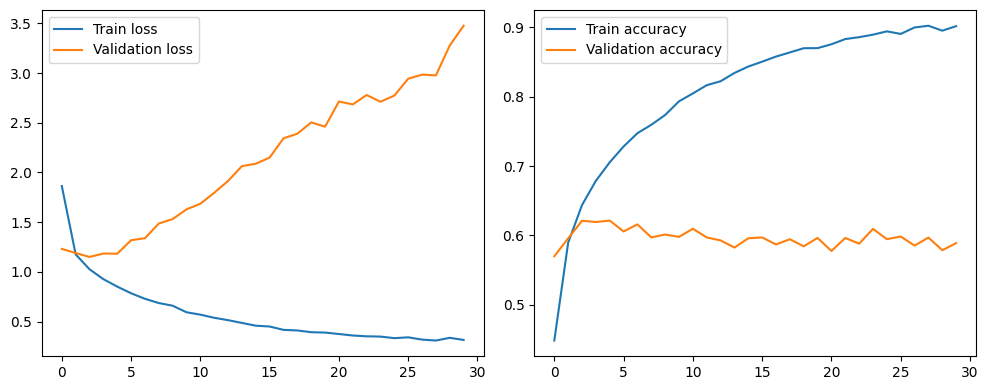

In [15]:
plot_history(h)

The network shows clear signs of overfitting. Train and validation losses diverge, train accuracy goes above 90% while validation accuracy is stuck, and actually decreases.  

# 3) Now with data augmentation

We are using exactly the same network structure, but just after the input we'll put a few data augmentation layers. These layers are active only at training time and are turned off at inference (prediction) time.

In [16]:
#adding data augmentations layers

# Define the model
model = keras.Sequential([
    #input
    layers.Input(shape=input_shape),

    #data augmentation
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),

    #the same architecture as above
    layers.Conv2D(32, (3,3), activation='relu'),  # Convolutional layer
    layers.MaxPooling2D((2,2)),  # Max pooling layer
    layers.Conv2D(64, (3,3), activation='relu'),  # Another convolutional layer
    layers.MaxPooling2D((2,2)),  # Another pooling layer
    layers.Flatten(),  # Flatten feature maps into a vector
    layers.Dense(128, activation='relu'),  # Fully connected layer
    layers.Dense(n_classes, activation='softmax')  # Output layer with as many nodes as classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ random_flip_1 (RandomFlip)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation_1 (RandomRotation)   │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom_1 (RandomZoom)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

Note that the number of trainable parameters did not chance: 315722, exactly the same number as in the network without data augmentation. This is expected, since data augmentation doesn't learn anything.

In [17]:
#let's train the model again!
h_da = model.fit(x=x_train, y=y_train, validation_data=(x_val, y_val), epochs=n_epochs, batch_size=batch_size, verbose = verbosity)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.2547 - loss: 3.7068 - val_accuracy: 0.4276 - val_loss: 1.5720
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4258 - loss: 1.5906 - val_accuracy: 0.5015 - val_loss: 1.4108
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4705 - loss: 1.4780 - val_accuracy: 0.5071 - val_loss: 1.3880
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4974 - loss: 1.4095 - val_accuracy: 0.5355 - val_loss: 1.3222
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.5146 - loss: 1.3576 - val_accuracy: 0.5644 - val_loss: 1.2465
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5288 - loss: 1.3311 - val_accuracy: 0.5735 - val_loss: 1.2364
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5493 - loss: 1.2877 - val_accuracy: 0.5771 - val_loss: 1.2335
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5604 - loss: 1

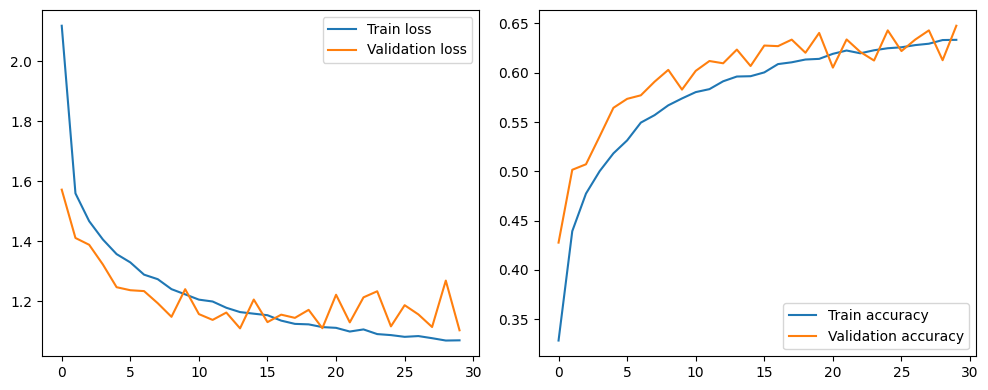

In [18]:
plot_history(h_da)

The model now behaves way better. Train and validation losses follow the same pattern, as do validation. The overall performances are better, and this network would be a strong starting point for further refining.